In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [19]:
# read Customer data and size of the data
customer_data = pd.read_csv("/content/Customers.csv")
print(customer_data.shape)
customer_data


(200, 4)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [20]:
# read Customer data and size of the data
product_data = pd.read_csv("/content/Products.csv")
print(product_data.shape)
product_data

(100, 4)


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [21]:
transaction_data = pd.read_csv("/content/Transactions.csv")
print(transacation_data.shape)
transacation_data

(1000, 7)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [27]:
customer_data.info()
print("__________________________________________________")
product_data.info()
print("__________________________________________________")
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 

In [28]:
# convert the dtype of the customers data and transactions data from object to datetime
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
transaction_data['TransactionDate'] = pd.to_datetime(transaction_data['TransactionDate'])

In [29]:
customer_data.info()
print("__________________________________________________")
product_data.info()
print("__________________________________________________")
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
__________________________________________________
<class 'pandas.core.frame.Da

In [30]:
def print_dataset_info(df, name):
    print("\nMissing Values:")
    print(df.isnull().sum())

print_dataset_info(customer_data, "Customers")
print_dataset_info(product_data, "Products")
print_dataset_info(transaction_data, "Transactions")


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [32]:
def print_dataset_info(df, name):
    print("\nDescribe:")
    print(df.describe())

print_dataset_info(product_data, "Products")
print_dataset_info(transaction_data, "Transactions")


Describe:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Describe:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


# Assignment Tasks:
Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
- Write these insights in short point-wise sentences (maximum 100 words per
insight).


In [38]:
# Customer Analysis
def analyze_customers():
    # 1. Regional distribution
    plt.figure(figsize=(12, 6))
    customer_data['Region'].value_counts().plot(kind='bar')
    plt.title('Customer Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Customer signup trends
    plt.figure(figsize=(12, 6))
    customer_data['SignupDate'].dt.year.value_counts().sort_index().plot(kind='line', marker='o')
    plt.title('Customer Signup Trends by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of New Signups')
    plt.tight_layout()
    plt.show()

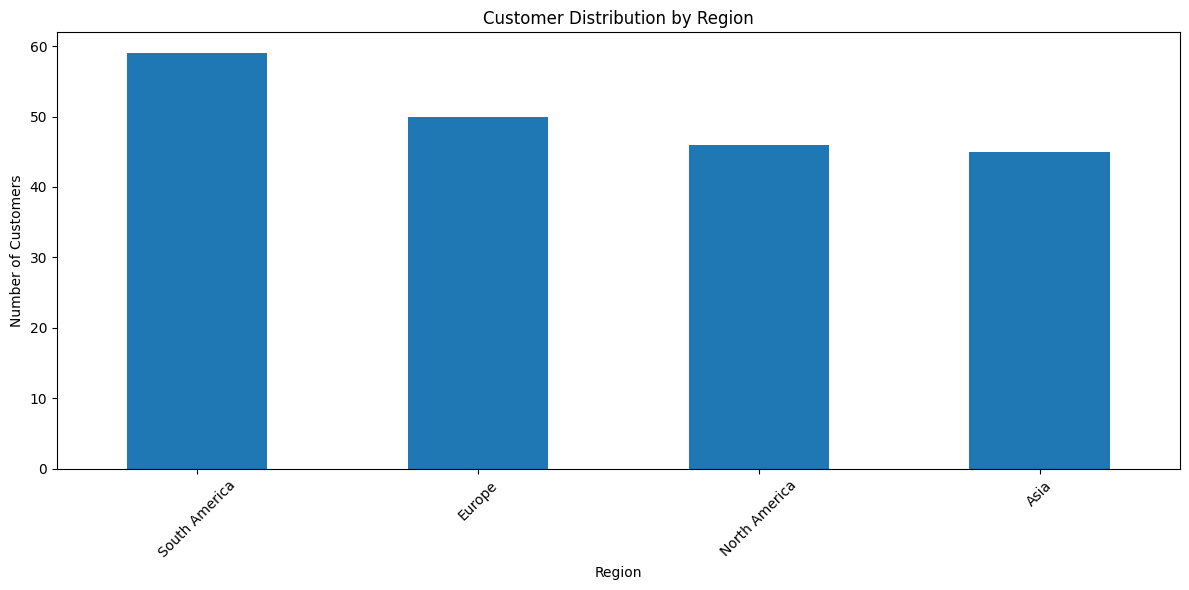

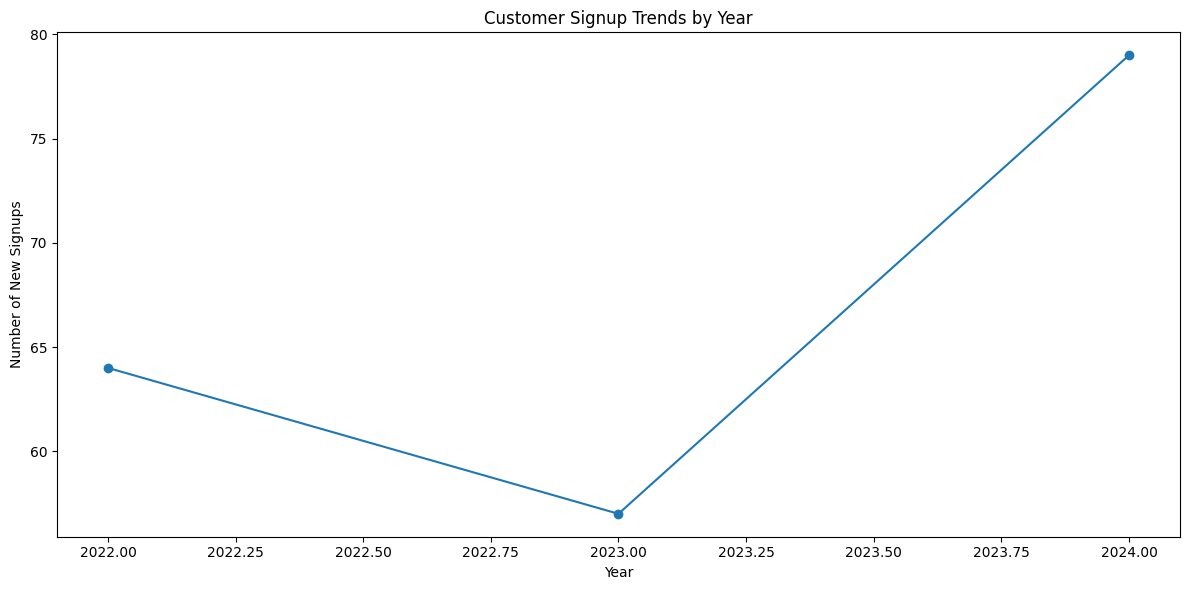

In [39]:
analyze_customers()

In [40]:
#  Product Analysis
def analyze_products():
    # 3. Category distribution
    plt.figure(figsize=(10, 6))
    product_data['Category'].value_counts().plot(kind='bar')
    plt.title('Product Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Products')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #4. Price distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=product_data, x='Price', bins=50)
    plt.title('Product Price Distribution')
    plt.xlabel('Price (USD)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

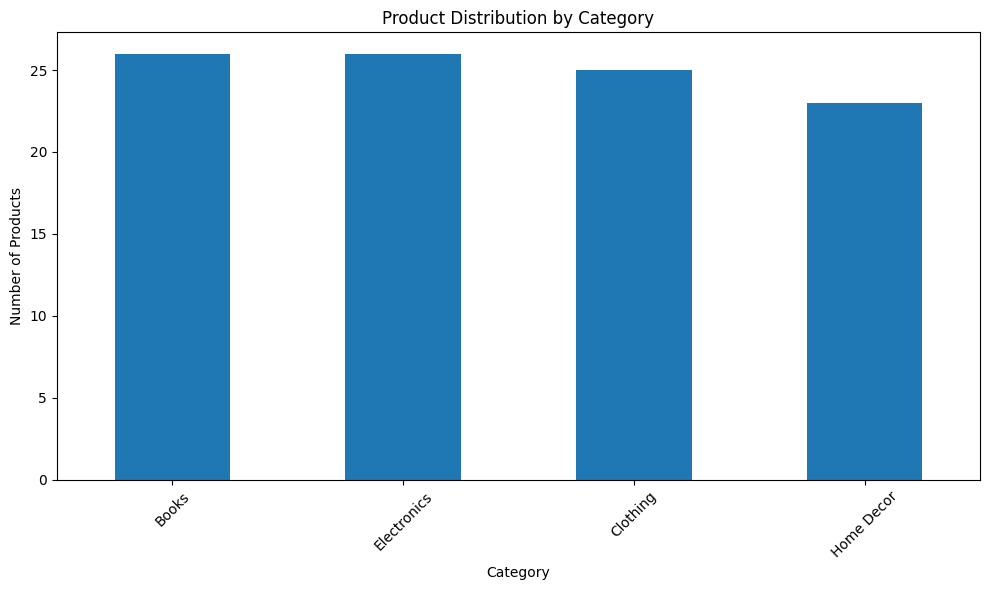

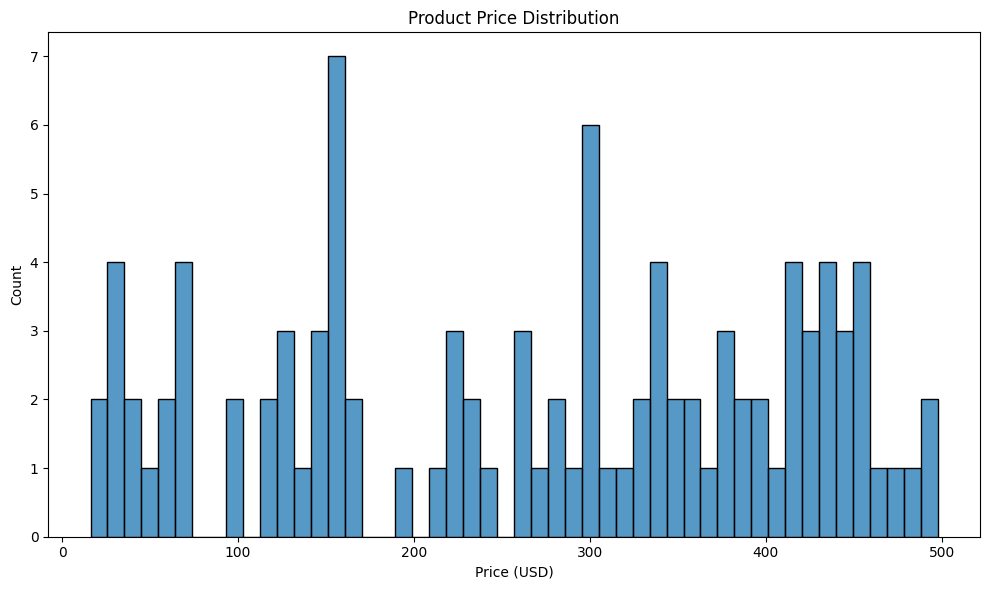

In [41]:
analyze_products()

In [44]:
# Transaction Analysis
def analyze_transactions():
    # 5. Merge transactions with customer and product info
    full_transactions = transaction_data.merge(customer_data[['CustomerID', 'Region']], on='CustomerID')
    full_transactions = full_transactions.merge(product_data[['ProductID', 'Category']], on='ProductID')

    #6.  Transaction value by region
    plt.figure(figsize=(12, 6))
    region_sales = full_transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    region_sales.plot(kind='bar')
    plt.title('Total Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 7. Sales trends over time
    plt.figure(figsize=(12, 6))
    monthly_sales = full_transactions.groupby(full_transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
    monthly_sales.plot(kind='line')
    plt.title('Monthly Sales Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Sales (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 8. Category performance
    plt.figure(figsize=(12, 6))
    category_sales = full_transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    category_sales.plot(kind='bar')
    plt.title('Sales by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


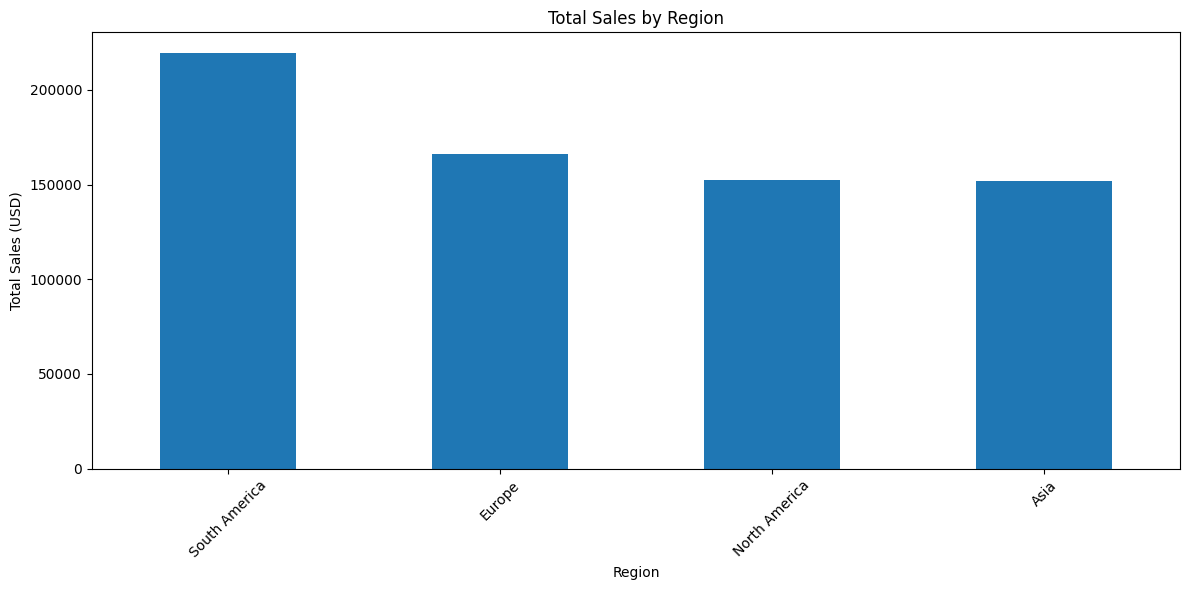

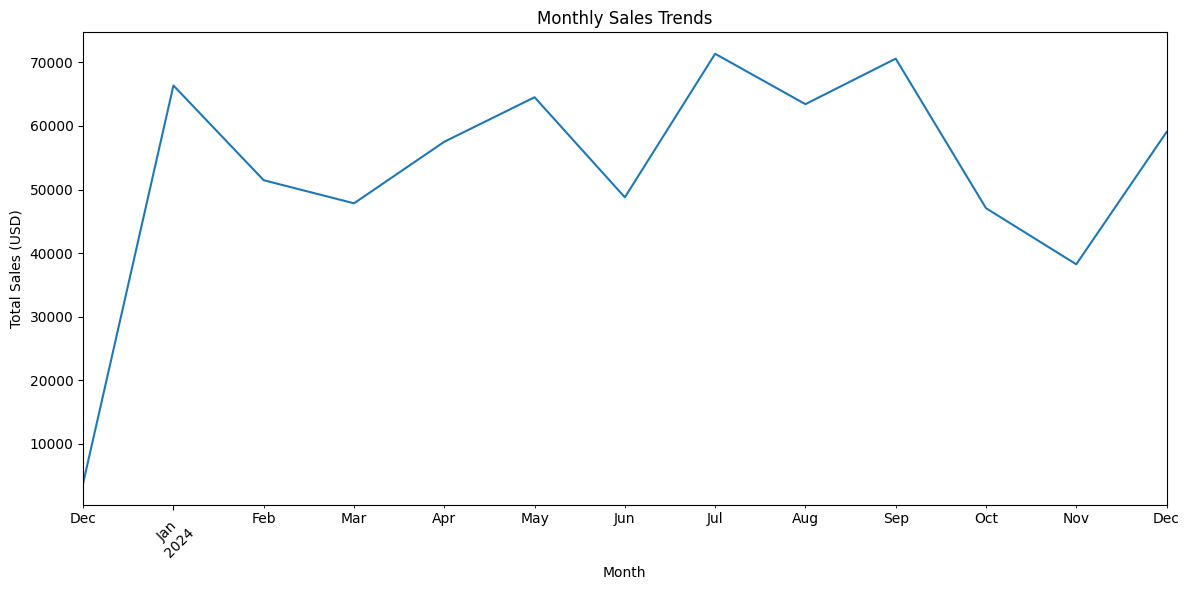

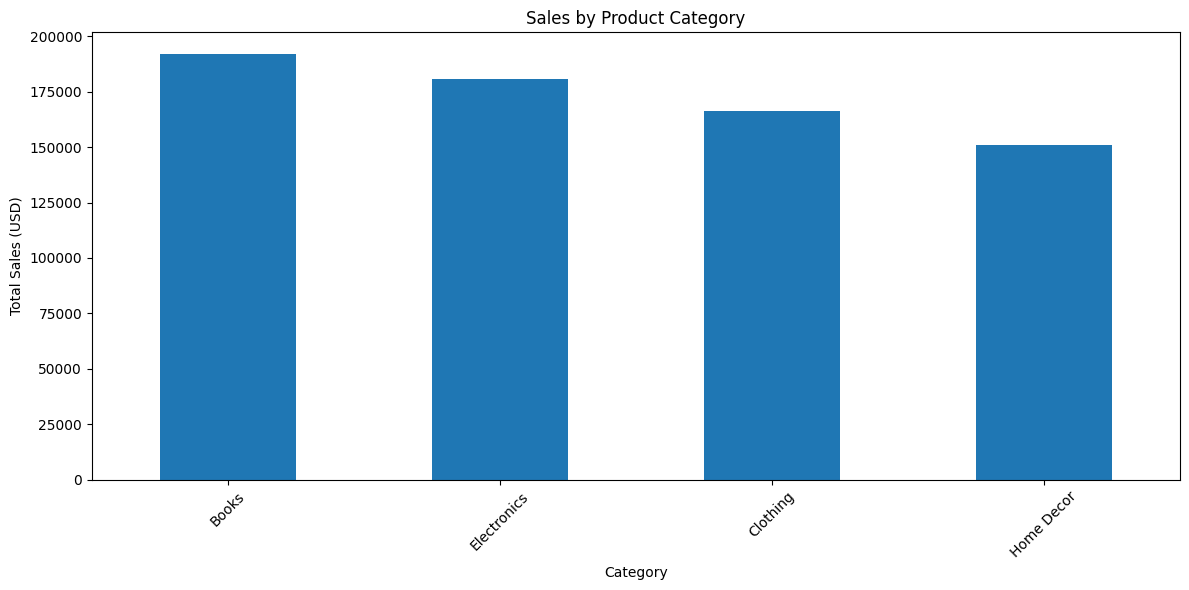

In [45]:
analyze_transactions()

In [46]:
# 9. Customer Value Analysis
def analyze_customer_value():
    # Calculate customer lifetime value
    customer_value = transaction_data.groupby('CustomerID')['TotalValue'].agg([
        ('total_spend', 'sum'),
        ('avg_transaction', 'mean'),
        ('num_transactions', 'count')
    ]).round(2)

    # Identify top customers
    top_customers = customer_value.sort_values('total_spend', ascending=False).head(10)
    print("\nTop 10 Customers by Total Spend:")
    print(top_customers)

    # Customer spend distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=customer_value, x='total_spend', bins=50)
    plt.title('Customer Lifetime Value Distribution')
    plt.xlabel('Total Spend (USD)')
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    plt.show()


Top 10 Customers by Total Spend:
            total_spend  avg_transaction  num_transactions
CustomerID                                                
C0141          10673.87          1067.39                10
C0054           8040.39          1005.05                 8
C0065           7663.70           766.37                10
C0156           7634.45           694.04                11
C0082           7572.91          1081.84                 7
C0188           7111.32           888.92                 8
C0059           7073.28           884.16                 8
C0028           6819.57           852.45                 8
C0099           6715.72           839.46                 8
C0165           6708.10           745.34                 9


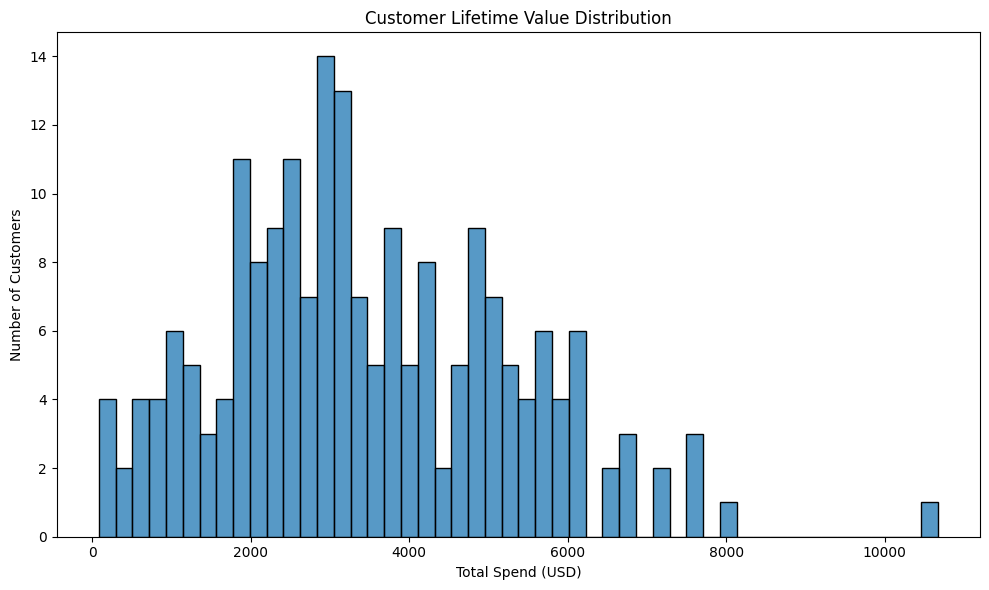

In [47]:
analyze_customer_value()